In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [2]:
uploaded = files.upload()



Saving sjf.jpg to sjf.jpg


In [3]:
image_path = list(uploaded.keys())[0]
print("Image uploaded:", image_path)


Image uploaded: sjf.jpg


In [4]:
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)


In [6]:
img = cv2.imread("/content/sjf.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [7]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5
)


In [8]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


Number of faces detected: 1


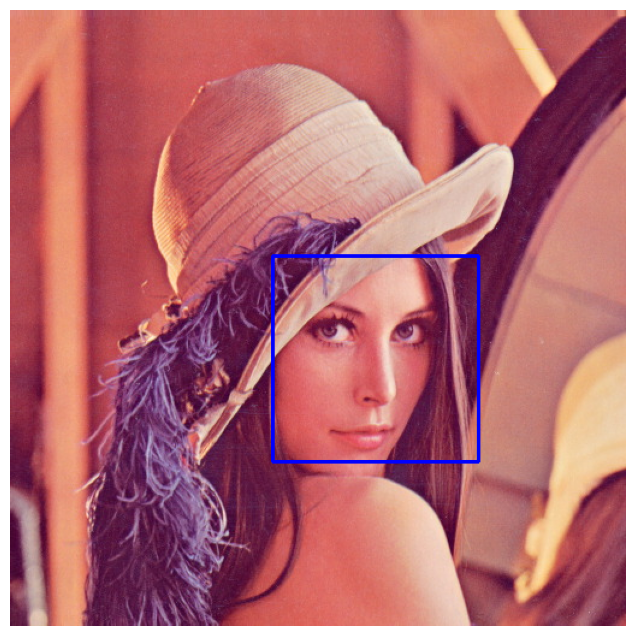

In [9]:
print("Number of faces detected:", len(faces))

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [49]:
uploaded = files.upload()


Saving imggg.jpg to imggg.jpg


In [50]:
image_path = list(uploaded.keys())[0]
print("Image uploaded:", image_path)


Image uploaded: imggg.jpg


In [51]:
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)


In [52]:
img = cv2.imread("/content/imggg.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [53]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.3,
    minNeighbors=5
)


In [54]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)


Number of faces detected: 4


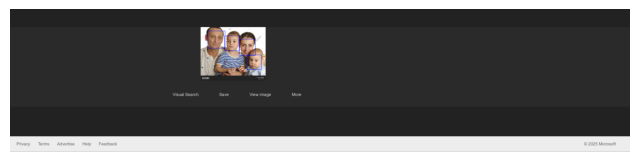

In [55]:
print("Number of faces detected:", len(faces))

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [56]:
face_images = []

for (x, y, w, h) in faces:
    face = gray[y:y+h, x:x+w]     # crop
    face = cv2.resize(face, (100, 100))  # resize
    face_images.append(face)


In [57]:
features = []

for face in face_images:
    features.append(face.flatten())

features = np.array(features)


In [58]:
print("Feature array shape:", features.shape)


Feature array shape: (4, 10000)


In [59]:
from numpy.linalg import norm

if len(features) >= 2:
    distance = norm(features[0] - features[1])
    print("Distance between Face 1 and Face 2:", distance)
else:
    print("Need at least 2 faces to compare.")


Distance between Face 1 and Face 2: 16858.306113011473


In [60]:
from skimage.feature import hog

hog_features = []

for face in face_images:
    hog_feat = hog(face,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    block_norm='L2-Hys')
    hog_features.append(hog_feat)

hog_features = np.array(hog_features)

print("HOG feature shape:", hog_features.shape)


HOG feature shape: (4, 4356)
